# Демонстрация алгоритма спектральной сокластеризации

Этот пример демонстрирует как генерировать датасет и бикластеризацию 
используя алгоритм спектральной сокластеризации.

Датасет сгенерирован используя метод ``make_biclusters``, которая 
создает матрицу маленьких значений и имплементирует бинарную кластеризацию с большим значением.
Затем строки и столбцы переставлены местами и передаются алгоритму спектральной сокластеризации.
Переупорядочивание переставленной матрицы сделано так чтобы бинарные кластеры были смежными, и показывает 
насколько точно алгоритм находит бинарные кластера.


In [1]:
%matplotlib inline

Automatically created module for IPython interactive environment
Консенсусная (согласованная) оценка: 1.000


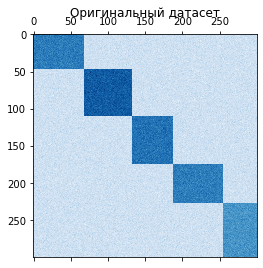

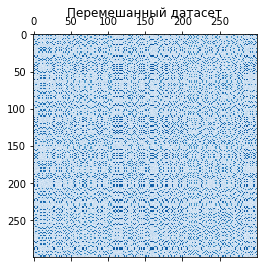

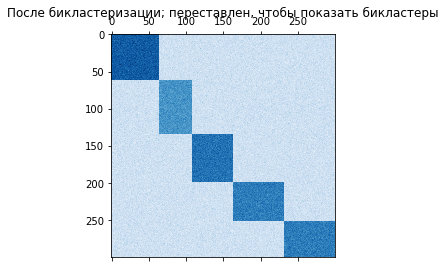

In [2]:
print(__doc__)

# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Оригинальный датасет")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Перемешанный датасет")

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("Консенсусная (согласованная) оценка: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("После бикластеризации; переставлен, чтобы показать бикластеры")

plt.show()